# Introduction to machine learning

HVL-RAD230/1-Kunstig-intelligens-og-beregningsorientert-medisin - `1-simple-ml-examples.ipynb` (_v.2022-05-09 A.L. / A.S.L._) <br><br>


<a href="https://colab.research.google.com/github/MMIV-ML/HVL-RAD230/blob/master/1-Kunstig-intelligens-og-beregningsorientert-medisin/1-simple-ml-examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# A first example of machine learning

Welcome to our very first example! In this Jupyter Notebook we'll use machine learning to study some standard banchmark data sets. 

You can download the notebook from the course GitHub repo: https://github.com/MMIV-ML/HVL-RAD230.

> You'll find some cells marked "Your turn!" below. These are meant to help you experiment with the code. 

The goal of this notebook is to introduce some of the basic ingredients and techniques in machine learning. 

We'll use a much studied, classical data set: [Iris flower data set](https://archive.ics.uci.edu/ml/datasets/iris)

<img src="https://github.com/MMIV-ML/HVL-RAD230/blob/main/1-Kunstig-intelligens-og-beregningsorientert-medisin/assets/iris.png?raw=true" width="800">

The task is to predict the Iris flower type, either *Iris-Setosa*, *Iris-Versicolor* or *Iris-Virginica*, from its sepal and petal lengths and widths ("begerblad" and "kronblad" in Norwegian). 

> Vocabulary: assigning each data point to a class is called **classification**.

We first have to set up our machine learning framework.

# Set up our ML framework

In [150]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


Throughout the course we'll use <a href="https://www.datacamp.com/community/tutorials/python-numpy-tutorial">numpy</a> for numerical calculations, <a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python">pandas</a> for working with tabular data (and more!), and <a href="https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python">matplotlib</a> to create plots. *You should familiarize yourself with all three!* The above links are to some short tutorials. You'll also find more in ELMED219's MittUiB page.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

# We set up Matplotlib to display plots directly in the notebook:
%matplotlib inline

> **Your turn:** Read about these and other *magic* commands by running `%magic` in a code cell. You can uncomment the command below and run the cell using `Shift+Enter`.

In [153]:
#%magic

We'll use `scikit-learn` for most of the hands-on parts of ELMED219 (except when we get to deep learning):

In [154]:
import sklearn

Next, we load, explore and prepare the Iris data set

# Load, explore and prepare the data

## Load the data

In general, collecting and preparing data for data analysis task forms a large part of a data science project. We'll discuss this in some detail later in the course. In this case, it's easy. Iris is a standard benchmark data set and comes built-in with scikit-learn:

In [155]:
from sklearn.datasets import load_iris

**Useful tip:** By placing a question mark in front of a Python object you'll get the documentation. (Alternatively, hit `Shift+Tab` in the cell). By using two question marks you'll get the source code.

In [156]:
#?load_iris

In [157]:
#??load_iris

In [158]:
iris_dataset = load_iris()

The key `DESCR` gives you a text description of the Iris data set:

In [159]:
#iris_dataset

In [160]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

List available *features* in the data set:

In [161]:
features = iris_dataset['feature_names']
print(f"Features: {features}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


List available *labels*:

In [162]:
print(f"Labels: {iris_dataset['target_names']}")

Labels: ['setosa' 'versicolor' 'virginica']


How much data do we have?

In [163]:
iris_dataset['data'].shape

(150, 4)

There are 150 rows and 4 columns of data. Each row is called a *sample*, each column a *feature*. 

The _labels_ of the data points are stored under the key `target`:

In [164]:
iris_dataset['target'].shape

(150,)

...coded as 0, 1 and 2, which corresponds to the various plants listed in `feature_names`:

In [165]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [166]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 corresponds to Iris-Setosa, 1 to Iris-Versicolor and 2 to Iris-Virginica.

It's often very convenient to use Pandas when working with text-based data sets. In the following cell we collect all the data in a `Pandas dataframe` (a tabular format):

In [167]:
iris_df = pd.DataFrame(iris_dataset['data'], columns=features)

Here are the first ten rows:

In [168]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


It's also convenient to add the labels to each sample:

In [169]:
iris_df['label'] = iris_dataset['target']

In [170]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualize the data

It's interesting to investigate the _distribution_ of the various features. We can use the plotting funtionality of Pandas to create **histograms**:

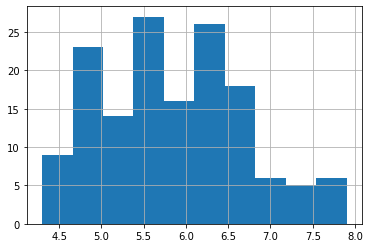

In [171]:
# The distribution of a specified feature for all the plants
feat = 'sepal length (cm)'
iris_df[feat].hist()
plt.show()

In [172]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

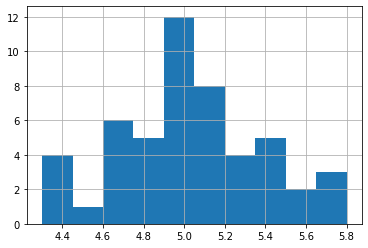

In [173]:
# The distribution of sepal lengths for a specified plant
plant = 0 # Iris-Setosa
iris_df[feat][iris_df['label'] == plant].hist()
plt.show()

**Scatter plots** can tell us how the various features differ among the different plants:

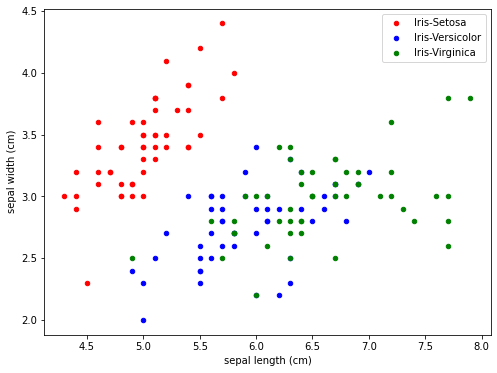

In [174]:
# Scatter plot for sepal length versus sepal width, colored by the plant class:

ax = iris_df[iris_df['label'] == 0].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='red', label='Iris-Setosa', figsize=(8,6))

iris_df[iris_df['label'] == 1].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='blue', label='Iris-Versicolor', ax=ax)

iris_df[iris_df['label'] == 2].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='green', label='Iris-Virginica', ax=ax)

plt.show()

Pandas can actually create these plots for us for each pair of features in the data frame. We color the dots by their label using `c = iris_df['label']`.

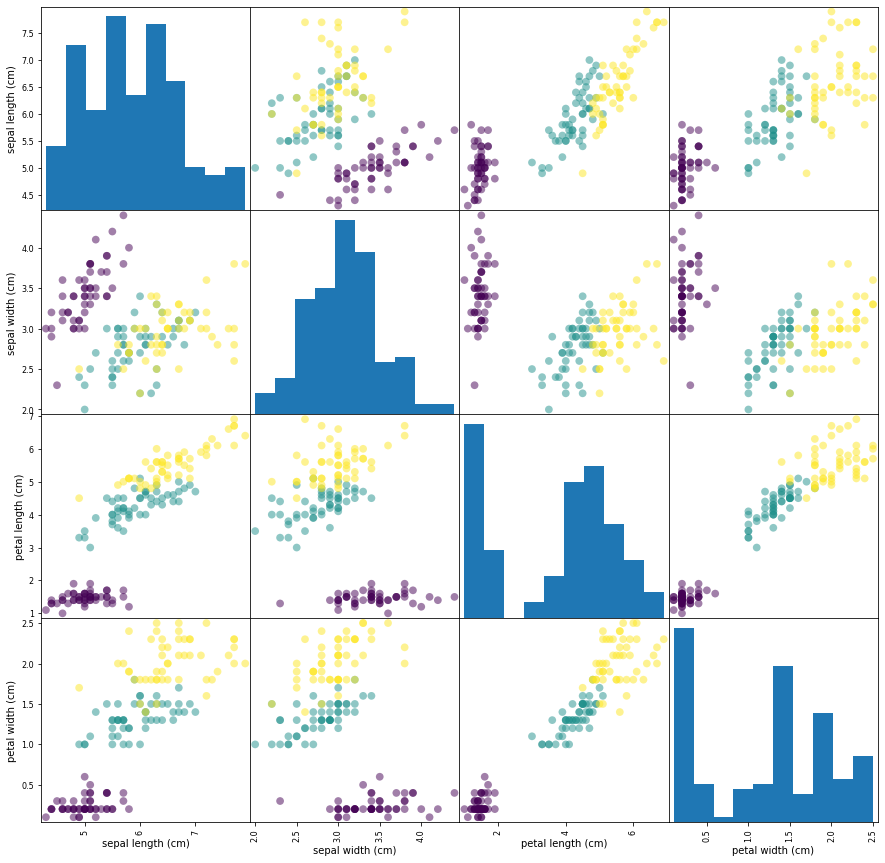

In [175]:
pd.plotting.scatter_matrix(iris_df[features], c=iris_df['label'], figsize=(15,15), marker='o', s=60)
plt.show()

We observe that the colors are highly separated. **To successfully train a machine learning model to distinguish the classes therefore seems promising!**

> Visualization of data forms a crucial part of applied machine learning. Carefully designed plots can reveal patterns in the data, patterns we can exploit when constructing predictive machine learning models. 

> **Your turn!** To get a feeling for the many different ways you can visualize data, have a quick look at the example gallery of the Python library `seaborn`: https://seaborn.pydata.org/examples/index.html. Feel free to play around with the examples. Here's a guide to the plotting features of Pandas, also worth a look: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html. You'll make use of these throughout the course.

## Feature engineering / selecting features to use

We can choose to train a model on one or more of the features. Let's use `sepal length` and `sepal width`:

In [176]:
# We select the 0'th and 1'st row since these contain sepal length and width:
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

In [177]:
X.shape

(150, 2)

We now have access to two measurements (sepal length and width) for 150 flowers. From these features, stored in X, our model should predict the correct label y.

Here are the first five measurements and their corresponding labels:

In [178]:
print(X[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [179]:
print(y[:5])

[0 0 0 0 0]


0 means Setaosa, 1 is Versicolor and 2 is Virginica (remember that Python lists are indexed starting from 0):

In [180]:
list(zip(range(len(y)), iris_dataset['target_names']))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

> The reason why we're not using all four features to construct our predictive models is that the problem would then be _too easy_. As you'll see further below. 

> Note that data preparation in general, and what's called **feature engineering** in particular, is one of the most important, time-consuming and difficult parts of applied machine learning (yet often underappreciated). In fact, the actual modelling work in applied machine learning is actually a very minor part in real-world machine learning systems development. Most of the time (and code) is spent on other things, like collecting data, cleaning data and designing good features. 

# Training and test data

We're building a machine learning model that should be able to predict Iris species for *new measurements*. To *simulate* such measurements we leave out a set of data when constructing the model, and use it to test the model. This set is called a **test set**. 

If we train the model using all the data it'll typically be able to "remember" the data, and not be able to produce correct predictions on *new* data. It will be bad at **generalization**. 

We use **training data to construct the model** and **test data to evaluate the model**.

Scikit-learn has a convenient `train_test_split` function that we'll use to set aside 25% of our data (including the corresponding labels) to be used as test data: 

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [183]:
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')

Training data: (112, 2)
Test data: (38, 2)


Let's collect the training data in a dataframe and display it:

In [184]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'][0:2])

In [185]:
iris_df.head(10)

,sepal length (cm),sepal width (cm)
0,5.0,3.6
1,5.2,4.1
2,5.8,2.7
3,6.0,3.4
4,6.7,3.1
5,5.4,3.9
6,5.4,3.7
7,5.5,2.4
8,6.3,2.8
9,6.4,3.1


...same with the test data

In [186]:
iris_df_test = pd.DataFrame(X_test, columns=iris_dataset['feature_names'][0:2])
iris_df_test.head(10)

,sepal length (cm),sepal width (cm)
0,6.1,2.8
1,5.7,3.8
2,7.7,2.6
3,6.0,2.9
4,6.8,2.8
5,5.4,3.4
6,5.6,2.9
7,6.9,3.1
8,6.2,2.2
9,5.8,2.7


# Machine learning model

There are many different machine learning models that can be used for classification. 

One of the most flexible (and best!) type of model are the so-called tree-based models. For example **random forests**, based on **decision trees**. You can read about random forests here: http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees, and about decision trees here: http://scikit-learn.org/stable/modules/tree.html.

Here, we'll use random forest as a "black box", without further explanation:

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

Classification models in scikit-learn are Python classes, and always come with `fit` and `predict` methods. `fit` is used to adapt the model to the data (i.e. *train* the model), while `predict` is used to produce predictions.

In [189]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

As you see, there are a bunch of parameters to choose in a `RandomForestClassifier`: 

In [190]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

We'll look at some of these later in the course. For now we're just using default values.

# Evaluate the model

In [191]:
y_pred = rf.predict(X_test)

The model has now made predictions on the test data, and we can check how well it performed. The *accuracy* of the predictions is a natural way to gauge performance. That is, the number of correct predictions divided by the total number of predictions. 

We'll learn about many other ways to evaluate machine learning models throughout the course.

In [192]:
from sklearn.metrics import accuracy_score

In [193]:
accuracy_score(y_test, y_pred)

0.7894736842105263

> **Your turn!**
- You can also use `rf.score` to find the accuracy. Try that.
- Try to change the default parameters in `RandomForestClassifier`. Can you get a better accuracy? Hint: try increasing `n_estimators`. We'll learn about what the parameters mean later in the course.
- Try to use all four features in the model (petal and sepal lengths and widths). How does the random forest perform?
- Change `RandomForestClassifier` to another classifier. For example `SGDClassifier`. Hint: `from sklearn.linear_model import SGDClassifier`.

# All the code gathered

Here's the code we used to load the data, select features, split into train and test sets, train a model, predict and evaluate. Eight lines of code!

In [194]:
# Load the data and split into data and labels
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

# Another example - The pima indians diabetes database

## Load, explore and prepare the data

Let's repeat the procedure on another benchmark data set: **Diabetes Data Set**. You'll find a description of the data set together with a link to the data here:  https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

In [195]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

As usual, we use Pandas to inspect and process text data:

In [196]:
diabetes = pd.read_csv(url)

In [197]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [198]:
len(diabetes)

768

We notice that there are eight feature columns and one target column (diabetes).

More information about the data can be found using `describe` and `info`:

In [199]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [200]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It's all numbers, and all the samples contain values for all the features (there are 768 non-NaN values). 

Here's a description of each feature (from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a>):
- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

As before we can visualize the connection between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

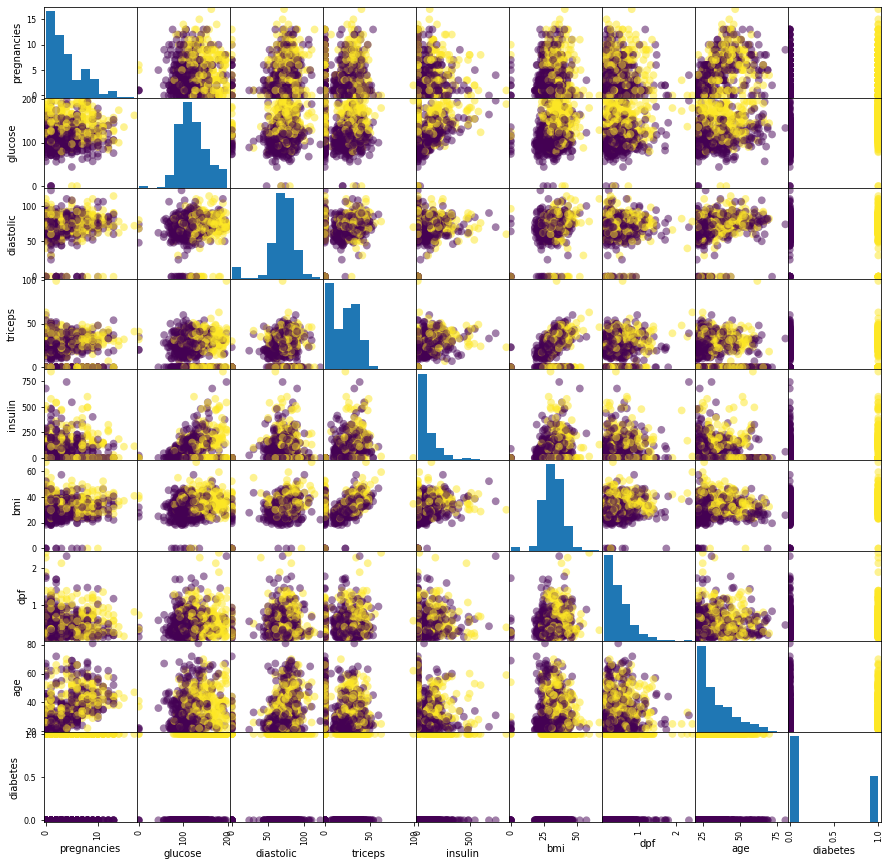

In [201]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=60)
plt.show()

We observe that this seems like a tougher problem than Iris. Still, let's follow the same procedure: 

### Select which features to use

... this time we'll use all the features to construct our model. We let `X` consist of all columns except `diabetes`:

In [202]:
X = diabetes[diabetes.columns[0:-1]]           

In [203]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


The target variable is in the `diabetes` column. `1` means diabetes, `0` not diabetes.

In [204]:
y = diabetes['diabetes']

In [205]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

### Training and test data

We split into training and test sets:

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine learning model

... and train a random forest model:

In [207]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) 
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [208]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Evaluate the model

Now we can make predictions on the test set and compute the accuracy:

In [209]:
y_pred = rf.predict(X_test)

In [210]:
accuracy_score(y_test, y_pred)

0.734375

With this model we can predict diabetes from the given features with an accuracy of 73%.

# Machine learning models are highly generic!

> **Important!** Notice that the way we studied the diabetes data was essentially identical to what we did for Iris! 

This was our Iris code:

In [211]:
# Load the data
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

Here's the code for diabetes:

In [212]:
# Load the data
diabetes = pd.read_csv('https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.734375

**The only difference is that we changed the data!** 

> **Machine learning models are generic: the same model can be used for many different tasks!**

# Further study of diabetes: understanding the model's predictions

An important part of constructing good machine learning models is inspecting what the model has learned. How it weighs the various features when making its decisions in specific cases, how it would react if the features were different in some interesting ways, and so on. This is useful both for improving the models and the input data, and, sometimes, to get a better understanding of the problem the model tries to solve (here's a very interesting example of this [img1](assets/stanford_1.png), [img2](assets/stanford_2.png), from [here](https://www.nature.com/articles/s41746-018-0029-1). We'll discuss this briefly in a later lecture.

For example, what features are the most, and least, important for our diabetes classifier? What's the relation between BMI and diabetes according to our model? 

## Feature importance

When using random forests it's possible to compute how much each feature influenced the predictions. The so-called **feature importance**.

In [213]:
importances = rf.feature_importances_

In [214]:
importances

array([0.07449143, 0.27876091, 0.08888318, 0.07157507, 0.07091345,
       0.15805822, 0.11822478, 0.13909297])

In [215]:
# Find index of those with highest importance, sorted from largest to smallest:
indices = np.argsort(importances)[::-1]

In [216]:
for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

glucose: 0.28
bmi: 0.16
age: 0.14
dpf: 0.12
diastolic: 0.09
pregnancies: 0.07
triceps: 0.07
insulin: 0.07


The glucose level has the largest explanatory value, followed by BMI. It's not hard to imagine that this kind of information is very useful in practice! However, it is something that **must be used carefully**, as the feature importances from a single model can be quite misleading. If you have a look at how random forests work, how they are constructed from quite brittle decision trees, you'll understand why this is the case.

## Permutation importance

Feature importances in the random forest classification models of scikit-learn is based on measuring how efficient each feature is in reducing uncertainty (the so-called *impurity* in random forests). Often this results in an incorrect estimate of how important each feature actually is (see https://explained.ai/rf-importance/index.html for a deep-dive into this). 

A more robust technique is what's called **permutation importance**. 

The idea is that if a feature is important for the predictions of a trained model then a random shuffling of the data in the corresponding column should drastically reduce the accuracy of the model. On the other hand, a random shuffling of an unimportant feature shouldn't impact the model much. 

The `eli5` library has an implementation of this idea, compatible with scikit-learn models. 
(More recently,`permutation_importance` has been incoporated into scikit-learn itself - see https://scikit-learn.org/stable/modules/permutation_importance.html and https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)

In [117]:
#if colab:
#    !pip install eli5
#    !pip install pdpbox

In [217]:
# import eli5
# from eli5.sklearn import PermutationImportance

from sklearn.inspection import permutation_importance

In [218]:
#perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)

r = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42)

In [219]:
sorted_idx = r.importances_mean.argsort()

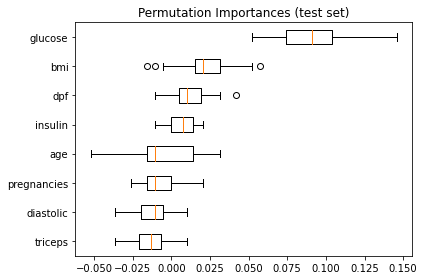

In [220]:
fig, ax = plt.subplots()
ax.boxplot(
    r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [221]:
# eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Using the `eli5` library, we get eli5_permutation_importance_diabetes.png:

<img src="https://github.com/MMIV-ML/HVL-RAD230/blob/main/1-Kunstig-intelligens-og-beregningsorientert-medisin/assets/eli5_permutation_importance_diabetes.png?raw=true" width="250">

We observe that `glucose` is the most important feature by far. If you shuffle `glucose` the model accuracy decreases by more than 10 percentage points. The four features that had negative weights were useless for the predictions: in fact, if you shuffle these at random you will sometimes obtain slightly *better* accuracy!

## Partial dependence plots

PDP is another useful way to understand and explain predictions made by machine learning algorithms.

The idea is to plot predictions while increasing a specified feature. For example, what happens to the predicted probability for diabetes as the glucose level increases? As this is an important feature we expect it to change quite a bit (in fact, since we're talking about diabetes we expect the probability to increase). And what about unimportant features like age? 

We can use the `PDPbox` library, which is compatible with scikit-learn (see https://pdpbox.readthedocs.io/en/latest for details):

In [222]:
from pdpbox import pdp

In [223]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='glucose')

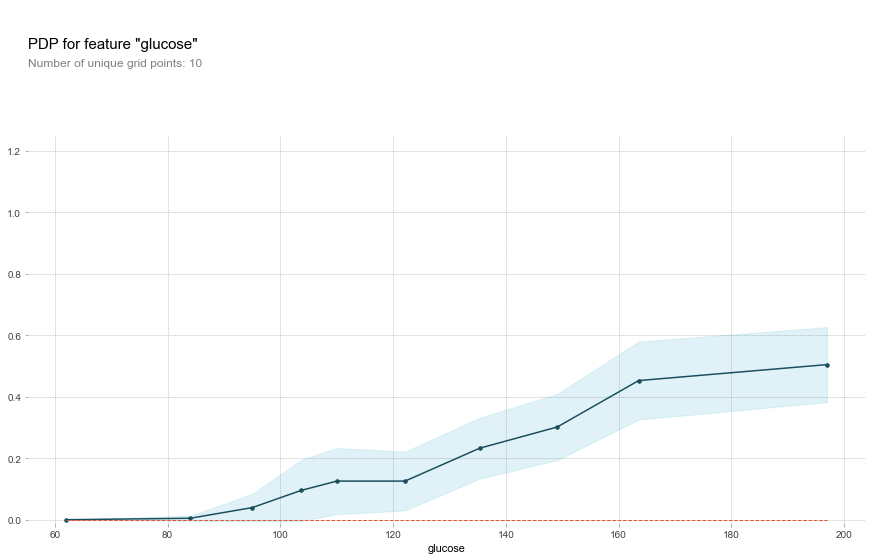

In [224]:
pdp.pdp_plot(pdp_goals, 'glucose')
plt.show()

We see that as the glucose level increases the predicted probability for diabetes increases. 

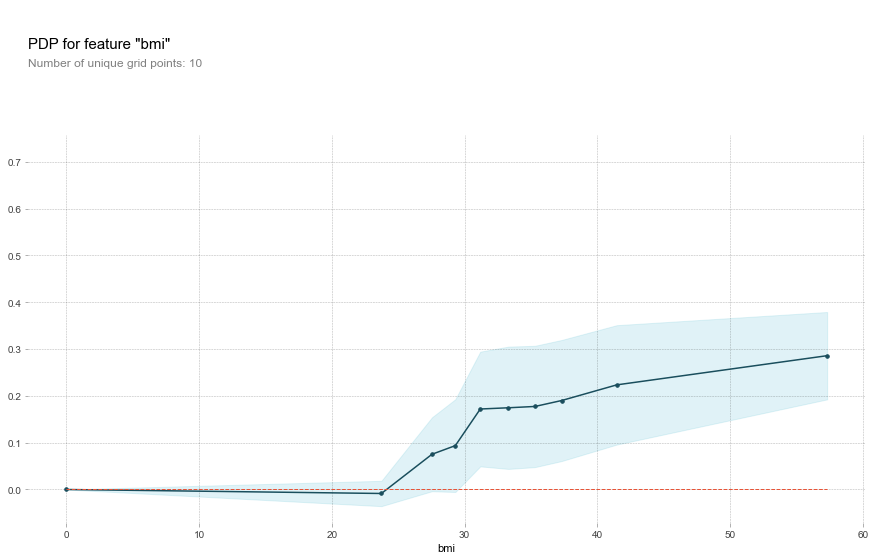

In [225]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='bmi')
pdp.pdp_plot(pdp_goals, 'bmi')
plt.show()

Same for BMI. The plot for age demonstrates why this feature is deemed unimportant: the probability increases a bit at the beginning (low ages), but then it actually decreases. 

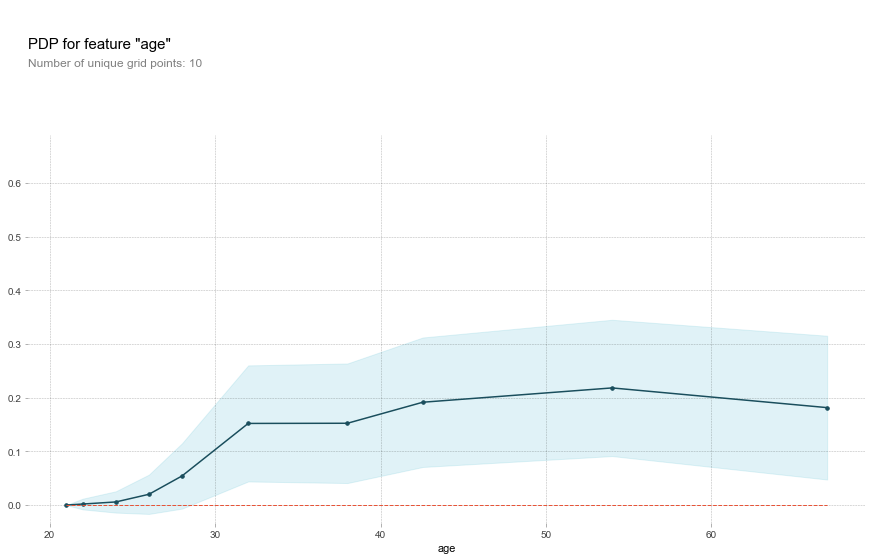

In [226]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='age')
pdp.pdp_plot(pdp_goals, 'age')
plt.show()

### Two-dimensional PDP

Typically it's the interaction among several features that influences model predictions, not each feature independently. By plotting two-dimensional interaction plots one can get a better understanding of how the features influence the predictions:

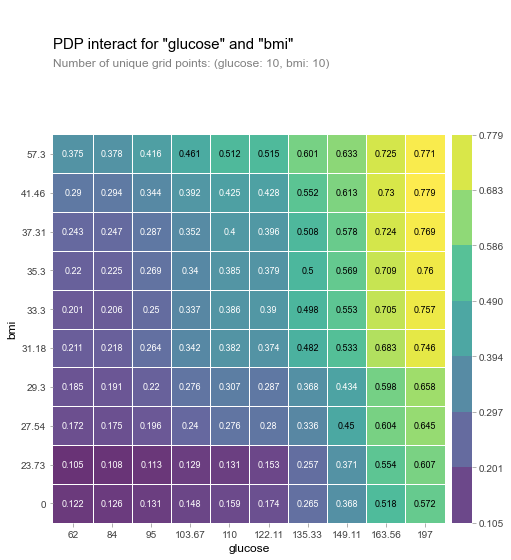

In [227]:
features = ['glucose', 'bmi']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

> **NOTE:** Of course, all these conclusions depend on the exact data set that we have used. To make any real inferences about diabetes and its relation to glucose level, BMI, age etc one would need a much more carefully designed data set. 

# Exercises

> **Your turn!**
- Get the feature importances for the Iris predictions. Is it sepal length or width that provides the most information?
- Construct another random forest by changing the `random_state`. What happens to the accuracy? What happens to the feature imporances?
- Try to create a better random forest by tuning the parameters. If you want to dive deep, use `grid_search` (http://scikit-learn.org/stable/modules/grid_search.html) to automatically find good parameters. 
- Try another classification model. 
- **Extra challenge**: Here's another well-prepared data set: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Download it and repeat the procedure above. This time the goal is to predict the country of origin of a car given various features. 